In [17]:
import pandas as pd
from matplotlib import pyplot as plt
tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions")
pd.set_option("display.max_rows", 30)
emissions_all = tables[1]
emissions_all.columns = ["Country", "CO2 1990", "CO2 2005", "CO2 2017", "2017 in %", "2017 vs 1990", "2017 Land area", "2017 per capita", "2018 total", "2018 total exc LUCF"]
emissions_all

,Country,CO2 1990,CO2 2005,CO2 2017,2017 in %,2017 vs 1990,2017 Land area,2017 per capita,2018 total,2018 total exc LUCF
0,World,22674.116,30049.809,37077.404,100.00%,63.5%,73.0,4.9,36431.11,35247.21
1,World – International Aviation,258.941,422.777,543.381,1.47%,109.8%,NaN,NaN,NaN,NaN
2,World – International Shipping,371.804,572.169,677.248,1.83%,82.2%,NaN,NaN,NaN,NaN
3,Afghanistan,2.546,1.063,11.422,0.03%,348.6%,18.0,0.3,7.59,7.44
4,Albania,6.583,4.196,5.026,0.01%,-23.7%,175.0,1.7,5.32,5.56
...,...,...,...,...,...,...,...,...,...,...
207,Vietnam,20.182,99.231,218.729,0.59%,983.8%,660.0,2.3,245.36,257.86
208,Western Sahara,0.144,0.227,0.276,0.00%,91.7%,1.0,0.5,NaN,NaN
209,Yemen,6.887,21.768,12.503,0.03%,81.5%,24.0,0.4,9.31,9.31
210,Zambia,2.955,2.457,4.967,0.01%,68.1%,7.0,0.3,40.47,7.74


In [18]:
country_table = pd.read_html("https://en.wikipedia.org/wiki/ISO_3166-1")
dic_replace = {"Falkland Islands (Malvinas)[b]":"Falkland Islands", "Macao":"Macau", "Saint Helena, Ascension and Tristan da Cunha[d]" : "Saint Helena, Ascension and Tristan da Cunha", 
"Taiwan, Province of China[b]":"Taiwan", "Virgin Islands (British)":" British Virgin Islands", "Western Sahara[b]":"Western Sahara"}
UN_country = country_table[1].replace(dic_replace)
dependent_states = UN_country.loc[UN_country['Independent'] == 'No', ['English short name (using title case)']]
dependent_states

,English short name (using title case)
1,Åland Islands
4,American Samoa
7,Anguilla
8,Antarctica
12,Aruba
...,...
236,United States Minor Outlying Islands[f]
242,British Virgin Islands
243,Virgin Islands (U.S.)
244,Wallis and Futuna


In [19]:
pd.set_option("display.max_rows", 20)
dependent_filter = emissions_all.loc[(~emissions_all['Country'].isin(dependent_states['English short name (using title case)']))]
countries_only = dependent_filter.loc[~(dependent_filter['Country'].str.contains('World'))  & ~(dependent_filter['Country'] == 'European Union')]
countries_only

,Country,CO2 1990,CO2 2005,CO2 2017,2017 in %,2017 vs 1990,2017 Land area,2017 per capita,2018 total,2018 total exc LUCF
3,Afghanistan,2.546,1.063,11.422,0.03%,348.6%,18.0,0.3,7.59,7.44
4,Albania,6.583,4.196,5.026,0.01%,-23.7%,175.0,1.7,5.32,5.56
5,Algeria,65.677,98.197,159.929,0.43%,143.5%,67.0,3.9,151.87,151.67
6,Angola,5.851,15.975,30.876,0.08%,427.7%,25.0,1.0,62.93,27.34
8,Antigua and Barbuda,0.223,0.283,0.624,0.00%,179.8%,1412.0,6.1,0.53,0.53
...,...,...,...,...,...,...,...,...,...,...
206,Venezuela,109.268,152.464,145.877,0.39%,33.5%,159.0,4.6,181.29,138.16
207,Vietnam,20.182,99.231,218.729,0.59%,983.8%,660.0,2.3,245.36,257.86
209,Yemen,6.887,21.768,12.503,0.03%,81.5%,24.0,0.4,9.31,9.31
210,Zambia,2.955,2.457,4.967,0.01%,68.1%,7.0,0.3,40.47,7.74


### Graph One: Top 5 CO2 Producers

Text(0, 0.5, 'CO2 emissions (Mt CO2)')

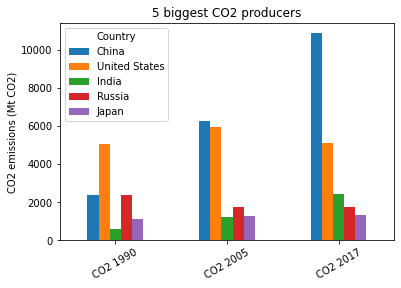

In [20]:

sort_countries = countries_only.sort_values(by=['CO2 2017'], ascending=False)
big_five = sort_countries.iloc[0:5, 0:4].set_index("Country")
big_five.T.plot.bar(title='5 biggest CO2 producers')
plt.xticks(rotation = 30, horizontalalignment = "center")
plt.ylabel("CO2 emissions (Mt CO2)")


### Graph Two: Relative change

In [54]:
def relative_change(base, target_year):
    return round(target_year / base *100, 2)


focus_columns = countries_only.iloc[:, 0:4]
focus_columns['Change 2005'] = relative_change(focus_columns['CO2 1990'], focus_columns['CO2 2005'])
focus_columns['Change 2017'] = relative_change(focus_columns['CO2 1990'], focus_columns['CO2 2017'])
focus_columns

,Country,CO2 1990,CO2 2005,CO2 2017,Change 2005,Change 2017
3,Afghanistan,2.546,1.063,11.422,41.75,448.63
4,Albania,6.583,4.196,5.026,63.74,76.35
5,Algeria,65.677,98.197,159.929,149.52,243.51
6,Angola,5.851,15.975,30.876,273.03,527.70
8,Antigua and Barbuda,0.223,0.283,0.624,126.91,279.82
...,...,...,...,...,...,...
206,Venezuela,109.268,152.464,145.877,139.53,133.50
207,Vietnam,20.182,99.231,218.729,491.68,1083.78
209,Yemen,6.887,21.768,12.503,316.07,181.54
210,Zambia,2.955,2.457,4.967,83.15,168.09
